# MNIST Dataset

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning. It was created by "re-mixing" the samples from NIST's original datasets. The creators felt that since NIST's training dataset was taken from American (should be US - not American ) Census Bureau employees, while the testing dataset was taken from USA high school students, it was not well-suited for machine learning experiments. Furthermore, the black and white images from NIST were normalized to fit into a 28x28 pixel bounding box and anti-aliased, which introduced grayscale levels. 
 
MNIST is the de facto "Hello World" dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

![title](images/mnistexamples.png)

## Sample Images
The MNIST database contains 60,000 training images and 10,000 testing images. Half of the training set and half of the test set were taken from NIST's training dataset, while the other half of the training set and the other half of the test set were taken from NIST's testing dataset.

The set of images in the MNIST database is organized on two of NIST's databases: Special Database 1 and Special Database 3. Special Database 1 consists of digits written by high school students and Special Database 3 consists of digits written by employees of the United States Census Bureau.

## MNIST Files
There are 4 files: 
train-images-idx3-ubyte: training set images 
train-labels-idx1-ubyte: training set labels 
t10k-images-idx3-ubyte:  test set images 
t10k-labels-idx1-ubyte:  test set labels

The data is stored in a very simple file format designed for storing vectors and multidimensional matrices.
All the integers in the files are stored in the Most Sifnificant (MSB) first or high endian format used by most non-Intel processors. Users of Intel processors and other low-endian machines must flip the bytes of the header. 
 
The training set contains 60000 examples, and the test set 10000 examples. 
The first 5000 examples of the test set are taken from the original NIST training set. The last 5000 are taken from the original NIST test set. The first 5000 are cleaner and easier than the last 5000.

### The IDX File Format
The IDX file format is a simple format for vectors and multidimensional matrices of various numerical types. 
The basic format is: 
magic number (usually a four-byte integer)  
size in dimension 0  
size in dimension 1  
size in dimension 2  
.....  
size in dimension N  
data  
data  
data  
.....  

The magic number is usually a four-byte integer (MSB first). The first 2 bytes of it are always 0. 

The third byte codes the type of the data:  
0x08: unsigned byte  
0x09: signed byte  
0x0B: short (2 bytes)  
0x0C: int (4 bytes)  
0x0D: float (4 bytes)  
0x0E: double (8 bytes)  

The 4-th byte codes the number of dimensions of the vector/matrix: 1 for vectors, 2 for matrices.... 
The sizes in each dimension are 4-byte integers (MSB first, high endian, like in most non-Intel processors). 
The data is stored like in a C array, i.e. the index in the last dimension changes the fastest.

#### Training Set Label File (train-labels-idx1-ubyte):
[offset] | [type]     |     [value]     |     [description]
--- | --- | --- | ---
0000  |   32 bit integer | 0x00000801(2049) | magic number (MSB first) 
0004  |   32 bit integer | 60000            | number of items 
0008  |   unsigned byte  | ??               | label 
0009  |   unsigned byte  | ??               | label 
 | | ........ |  
xxxx  |   unsigned byte |  ??       |        label

The labels values are 0 to 9. 

#### Training Set Image File (train-images-idx3-ubyte):
[offset] | [type]      |    [value]     |     [description] 
--- | --- | --- |
0000  |   32 bit integer | 0x00000803(2051) | magic number 
0004  |   32 bit integer |  60000           | number of images 
0008  |   32 bit integer |  28              | number of rows 
0012  |   32 bit integer | 28               | number of columns 
0016  |   unsigned byte  | ??               | pixel 
0017  |   unsigned byte  | ??               | pixel 
| | ........ |
xxxx  |   unsigned byte |  ??            |   pixel 

Pixels are organized row-wise. Pixel values are 0 to 255. 0 means background (white), 255 means foreground (black). 

#### Test Set Label File (t10k-labels-idx1-ubyte):
[offset] | [type]     |     [value]     |     [description] 
--- | --- | --- | ---
0000  |   32 bit integer | 0x00000801(2049) | magic number (MSB first) 
0004  |   32 bit integer |  10000       |     number of items 
0008  |   unsigned byte |  ??         |      label 
0009  |   unsigned byte |  ??         |      label 
| | ........ |
xxxx   |  unsigned byte  | ??          |     label 

The labels values are 0 to 9. 
#### Test Set Image File (t10k-images-idx3-ubyte):
[offset] | [type]    |      [value]     |     [description] 
--- | --- | --- | ---
0000   |  32 bit integer | 0x00000803(2051) | magic number 
0004   |  32 bit integer | 10000           | number of images 
0008   |  32 bit integer | 28              | number of rows 
0012   |  32 bit integer | 28              | number of columns 
0016   |  unsigned byte  | ??              | pixel 
0017   |  unsigned byte  | ??              | pixel 
| | ........ |
xxxx  |   unsigned byte  | ??              |  pixel 

Pixels are organized row-wise. Pixel values are 0 to 255. 0 means background (white), 255 means foreground (black).  

## Reading Bytes From The Files

The MNIST files originally are compressed. In order to use them we have to decompress them. We can make use of a decompression program, but since Python has support for the GZIP compression format we'll use that instead.

In [1]:
# https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/mnist.ipynb
import gzip

with gzip.open('data/t10k-images-idx3-ubyte.gz', 'rb') as f:
    file_content = f.read()

The uncompressed data of the test set image file is now contained in the variable 'file_content'. Let's try to find out what type of data it is:

In [2]:
type(file_content)

bytes

As expected, the file contain genereric bytes. Following the indications about the file format the first 4 bytes (that is, the first 32-bit integer) should give us back the magic number.

In [3]:
file_content[0:4]

b'\x00\x00\x08\x03'

Again, as stated by the format specification, the first two bytes are zeroed. The third byte codes the type of the data: '0x08' means unsigned bytes. The fourth byte specifies how many integers characterize the data: 3 means that the following three integers after the magic number are used to describe the data contained in the file. Let's see those three next integers.  

Remember, integers are 4-byte long. Here it is the first integer:

In [4]:
file_content[4:8]

b"\x00\x00'\x10"

Well, it is a hexadecimal number written in the Least Significant Bit (MSB) format. Let's try to convert it into a decimal number in the Most Significat Bit format:

In [5]:
int.from_bytes(file_content[4:8], byteorder='big')

10000

The number '10000' means that there are 10000 images in this file.  

Let's check out the next integer:

In [6]:
file_content[8:12]

b'\x00\x00\x00\x1c'

Now in a MSB decimal:

In [7]:
int.from_bytes(file_content[8:12], byteorder='big')

28

The number '28' means that one dimension of the images contained in the file is 28 bytes long.

Now the next integer already in MSB decimal:

In [8]:
int.from_bytes(file_content[12:16], byteorder='big')

28

Again the number '28'. It means that the other dimension of the images contained in the file is 28 bytes long. So, now we know that the file contains 10000 images which dimensions are 28 bytes by 28 bytes.

At this point we have all the information to start reading the images in the file. Let's try to read the first image.

We know that the first image starts at byte (or offset) 16 of the file. Since the dimensions of the images are 28 bytes by 28 bytes lets try to fetch all the image bytes at once, that means to get 784 bytes (28 times 28). 

In [9]:
first_image = file_content[16:800] # 800 = 784 + 16 bytes of offset

Now let's shape all thos 784 bytes into a 28 bytes by 28 bytes matrix. For that, we create a list of objects that will be easily converted into a matrix of bytes

In [16]:
import numpy as np
first_image_matrix = np.array(list(first_image)).reshape(28,28)
first_image_matrix

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

Ok, let's try to plot this image

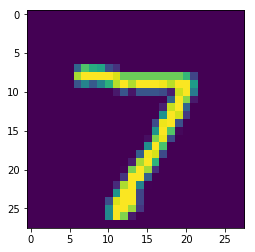

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(first_image_matrix)